<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Rappi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/Kaggle'

In [4]:
!kaggle datasets download -d alexbonella/sales-simulation-at-rappi

  0% 0.00/492k [00:00<?, ?B/s]
100% 492k/492k [00:00<00:00, 35.9MB/s]


In [5]:
!unzip '/content/sales-simulation-at-rappi.zip' && rm '/content/sales-simulation-at-rappi.zip'

Archive:  /content/sales-simulation-at-rappi.zip
  inflating: Sales_simulation.csv    


In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/Sales_simulation.csv')
data.tail()

,Unnamed: 0,purchase_ID,Date at created,Category,Name,Purchase Price,Delivery Price,Total
23225,23225,23226,21-10-2020 16:24:40.930923,Desayunos · Típica,La Frijolada,8900,4500,13400
23226,23226,23227,21-10-2020 16:24:41.353098,Típica,Sopitas y Más,31800,4200,36000
23227,23227,23228,21-10-2020 16:24:41.673074,Desayunos · Típica,Calentao Express,23000,6000,29000
23228,23228,23229,21-10-2020 16:24:42.096380,Desayunos · Árabe,Boniato Sabores Vivos,37900,5300,43200
23229,23229,23230,21-10-2020 16:24:42.366544,Típica,Bandejas Mrg,17800,3800,21600


#Explore and clean data

In [7]:
data.shape

(23230, 8)

In [8]:
data.isnull().sum()

Unnamed: 0         0
purchase_ID        0
Date at created    0
Category           0
Name               0
Purchase Price     0
Delivery Price     0
Total              0
dtype: int64

In [9]:
data['Date at created'] = pd.to_datetime(data['Date at created'])

In [10]:
pv = pd.pivot_table(data, index ='Category', values='purchase_ID', aggfunc='count').sort_values('purchase_ID')
pv

,purchase_ID
Category,
Sushi · Desayunos,77
Alta Cocina · Italiana,81
Hamburguesas · Panadería,81
Perros Calientes,81
Hamburguesas · Pescados y Mariscos,86
...,...
Desayunos,1337
Saludable · Desayunos,1538
Desayunos · Típica,1586


In [58]:
data['Hour'] = data['Date at created'].apply(lambda x : x.hour).astype(str)
data['Minutes'] = data['Date at created'].apply(lambda x : x.minute).astype(str)
data['FinalHour'] = data[['Hour','Minutes']].agg(':'.join, axis=1)

In [66]:
data['FinalHour'] = data['FinalHour'].map({
       '14:42':'14:42', '14:43':'14:43', '14:44':'14:44', '14:45':'14:45', '14:46':'14:46', '14:47':'14:47', '14:48':'14:48',
       '14:49':'14:49', '14:50':'14:50', '14:51':'14:51', '14:52':'14:52', '14:53':'14:53', '14:54':'14:54', '14:55':'14:55',
       '14:56':'14:56', '14:57':'14:57', '14:58':'14:58', '14:59':'14:59', '15:0': '15:00', '15:1': '15:01', '15:2': '15:02', '15:3':'15:03',
       '15:4': '15:04', '15:5': '15:05', '15:6': '15:06', '15:7': '15:07', '15:8': '15:08', '15:9': '15:09', '15:10':'15:10', '15:11':'15:11',
       '15:12':'15:12', '15:13':'15:13', '15:14':'15:14', '15:15':'15:15', '15:16':'15:16', '15:17':'15:17', '15:18':'15:18',
       '15:19':'15:19', '15:20':'15:20', '15:21':'15:21', '15:22':'15:22', '15:23':'15:23', '15:24':'15:24', '15:25':'15:25',
       '15:26':'15:26', '15:27':'15:27', '15:28':'15:28', '15:29':'15:29', '15:30':'15:30', '15:31':'15:31', '15:32':'15:32',
       '15:33':'15:33', '15:34':'15:34', '15:35':'15:35', '15:36':'15:36', '15:37':'15:37', '15:38':'15:38', '15:39':'15:39',
       '15:40':'15:40', '15:41':'15:41', '15:42':'15:42', '15:43':'15:43', '15:44':'15:44', '15:45':'15:45', '15:46':'15:46',
       '15:47':'15:47', '15:48':'15:48', '15:49':'15:49', '15:50':'15:50', '15:51':'15:51', '15:52':'15:52', '15:53':'15:53',
       '15:54':'15:54', '15:55':'15:55', '15:56':'15:56', '15:57':'15:57', '15:58':'15:58', '15:59':'15:59', '16:0': '16:00',
       '16:1': '16:01', '16:2': '16:02', '16:3': '16:03', '16:4': '16:04', '16:5': '16:05', '16:6': '16:06', '16:7': '16:07', '16:8':'16:08',
       '16:9': '16:09', '16:10':'16:10', '16:11':'16:11', '16:12':'16:12', '16:13':'16:13', '16:14':'16:14', '16:15':'16:15',
       '16:16':'16:16', '16:17':'16:17', '16:18':'16:18', '16:19':'16:19', '16:20':'16:20', '16:21':'16:21', '16:22':'16:22',
       '16:23':'16:23', '16:24':'16:24'})

# Plot and charts

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102],
 [Text(0, 0, '14:42'),
  Text(1, 0, '14:43'),
  Text(2, 0, '14:44'),
  Text(3, 0, '14:45'),
  Text(4, 0, '14:46'),
  Text(5, 0, '14:47'),
  Text(6, 0, '14:48'),
  Text(7, 0, '14:49'),
  Text(8, 0, '14:50'),
  Text(9, 0, '14:51'),
  Text(10, 0, '14:52'),
  Text(11, 0, '14:53'),
  Text(12, 0, '14:54'),
  Text(13, 0, '14:55'),
  Text(14, 0, '14:56'),
  Text(15, 0, '14:57'),
  Text(16, 0, 

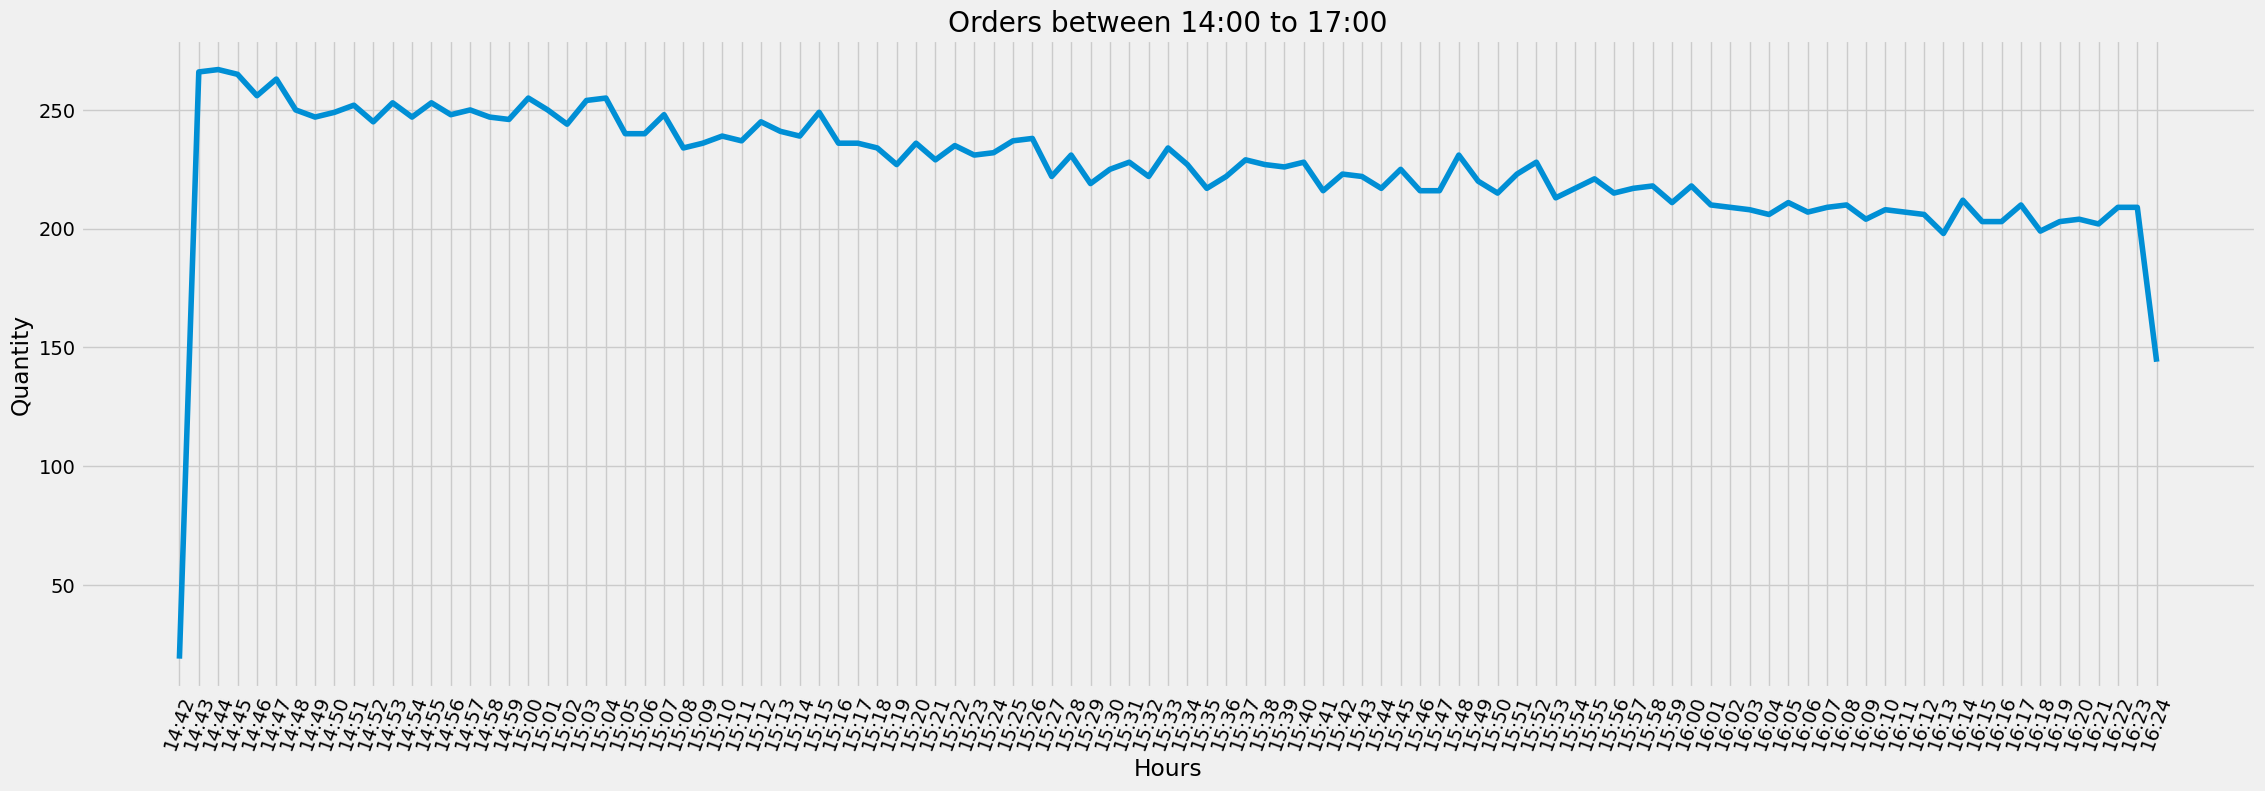

In [67]:
h = data.groupby(['FinalHour'])['purchase_ID'].count()

plt.figure(figsize=(25,8))
plt.plot(h.index,h.values)
plt.title("Orders between 14:00 to 17:00")
plt.xlabel("Hours")
plt.ylabel("Quantity")
plt.xticks(rotation=70)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23230 entries, 0 to 23229
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       23230 non-null  int64         
 1   purchase_ID      23230 non-null  int64         
 2   Date at created  23230 non-null  datetime64[ns]
 3   Category         23230 non-null  object        
 4   Name             23230 non-null  object        
 5   Purchase Price   23230 non-null  int64         
 6   Delivery Price   23230 non-null  int64         
 7   Total            23230 non-null  int64         
 8   Hour             23230 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 1.6+ MB
